In [29]:
%matplotlib notebook

In [45]:
# Dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random 
from sklearn.datasets import load_boston
from scipy.stats import sem
random.seed(42)

In [46]:
# Import the Boston housing data set and get description
boston_dataset = load_boston()
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [47]:
# Read Boston housing data into a Pandas dataframe
housing_data = pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)
housing_data['MEDV'] = boston_dataset.target
housing_data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [48]:
# Create a bunch of samples, each with sample size of 20
nsamples = 25
div = 20
samples = [housing_data.sample(20) for x in range (0, nsamples)]
samples

[         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
 236   0.52058   0.0   6.20   1.0  0.507  6.631   76.5  4.1480   8.0  307.0   
 111   0.10084   0.0  10.01   0.0  0.547  6.715   81.6  2.6775   6.0  432.0   
 321   0.18159   0.0   7.38   0.0  0.493  6.376   54.3  4.5404   5.0  287.0   
 3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
 28    0.77299   0.0   8.14   0.0  0.538  6.495   94.4  4.4547   4.0  307.0   
 45    0.17142   0.0   6.91   0.0  0.448  5.682   33.8  5.1004   3.0  233.0   
 184   0.08308   0.0   2.46   0.0  0.488  5.604   89.8  2.9879   3.0  193.0   
 140   0.29090   0.0  21.89   0.0  0.624  6.174   93.6  1.6119   4.0  437.0   
 327   0.24103   0.0   7.38   0.0  0.493  6.083   43.7  5.4159   5.0  287.0   
 363   4.22239   0.0  18.10   1.0  0.770  5.803   89.0  1.9047  24.0  666.0   
 463   5.82115   0.0  18.10   0.0  0.713  6.513   89.9  2.8016  24.0  666.0   
 377   9.82349   0.0  18.10   0.0  0.671  6.794   98

In [49]:
# Calculate means
means = [s.MEDV.mean() for s in samples]
# Calculate standard error on means
sems = [sem(s.MEDV) for s in samples]

print(means)
print(sems)

[20.51, 25.409999999999997, 20.015, 19.7, 24.669999999999998, 22.915000000000003, 22.02, 21.44, 24.880000000000003, 20.24, 22.665000000000003, 21.275000000000002, 23.635, 20.554999999999993, 24.740000000000002, 24.275, 23.05, 22.705, 17.735, 20.089999999999996, 24.15, 21.075, 23.15, 29.505000000000003, 20.330000000000002]
[1.3794716761366133, 2.1980362048644095, 1.7101288809542057, 1.2312167708580422, 2.66489952412548, 1.265374398516523, 1.9838373235514524, 2.246780152269371, 3.2633902294199637, 1.2886835387937159, 2.1481972246024044, 1.9698366883950984, 2.002120914903677, 1.7132682679296716, 1.8536933261379618, 1.9067314965668345, 1.7104400787978205, 1.3492390642994216, 1.3858927390712914, 2.1039924454537173, 2.54990711905149, 0.9070157835335322, 1.6239085403336053, 2.6627792663029037, 1.2358696064757504]


<IPython.core.display.Javascript object>


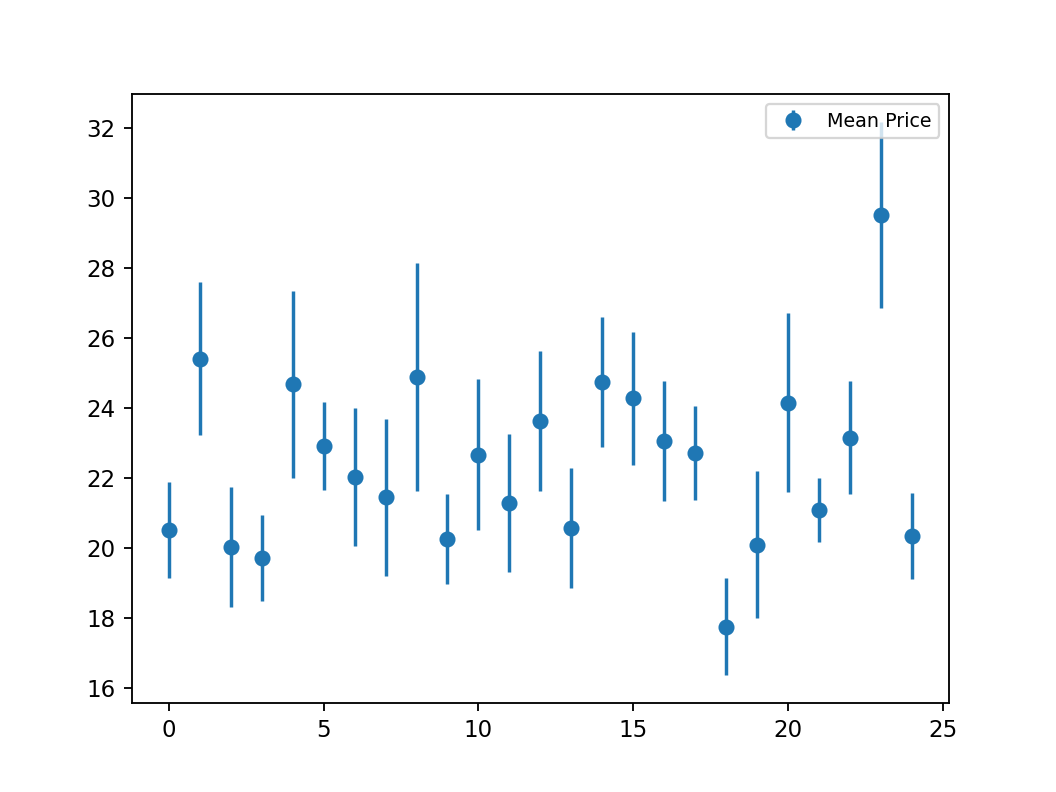

In [50]:
# Plot sample means with error bars
fig,ax = plt.subplots()
ax.errorbar(np.arange(0,len(samples),1),means,yerr = sems, fmt = "o",label="Mean Price")
plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()

In [51]:
# Calculate the range of SEM values
max(sems) - min(sems)


2.3563744458864315

In [52]:
# Determine which sample's mean is closest to the population mean
samp = sems.index(min(sems))+1

In [53]:
# Compare to the population mean
samples[samp].MEDV.mean()

23.15

In [54]:
housing_data.MEDV.mean()

22.532806324110698